# LIBRARIES

- Image Source: https://commons.wikimedia.org/wiki/File:Chicago_skyline,_viewed_from_John_Hancock_Center.jpg
- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# DATASET

In [2]:
#chic1= pd.read_csv("Chicago_Crimes_2001_to_2004.csv", error_bad_lines= False )
chic2= pd.read_csv("Chicago_Crimes_2005_to_2007.csv", error_bad_lines= False )
chic3= pd.read_csv("Chicago_Crimes_2008_to_2011.csv", error_bad_lines= False )
chic4= pd.read_csv("Chicago_Crimes_2012_to_2017.csv", error_bad_lines= False )
chic = pd.concat([chic2,chic3,chic4])
chic.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


# EDA

In [3]:
chic.shape

(6017767, 23)

In [4]:
chic.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.017767e+06,6.017767e+06,6.017767e+06,6.017678e+06,6.017675e+06,6.015923e+06,5.942885e+06,5.942885e+06,6.017767e+06,5.942885e+06,5.942885e+06
mean,2.104370e+06,7.037060e+06,1.191230e+03,1.130111e+01,2.265295e+01,3.784779e+01,1.164426e+06,1.885254e+06,2.009371e+03,4.184073e+01,-8.767214e+01
std,1.694528e+06,1.849589e+06,7.026427e+02,6.933820e+00,1.375739e+01,2.158409e+01,1.792610e+04,3.373090e+04,3.079192e+00,9.285315e-02,6.465034e-02
min,0.000000e+00,3.012000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,3.661945e+01,-9.168657e+01
25%,9.269010e+05,5.499442e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152773e+06,1.858676e+06,2.007000e+03,4.176759e+01,-8.771446e+01
50%,1.679122e+06,6.932575e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165910e+06,1.889744e+06,2.009000e+03,4.185293e+01,-8.766646e+01
75%,2.839172e+06,8.359282e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909091e+06,2.011000e+03,4.190640e+01,-8.762845e+01
max,6.254267e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [5]:
chic.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

Lots of columns to remove

In [6]:
chic.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Beat', 'FBI Code','Ward', 'Community Area', 'Location','Year', 'Latitude',
       'Longitude','District'], axis=1, inplace=True)

In [7]:
chic.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [8]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chic.Date = pd.to_datetime(chic.Date, format='%m/%d/%Y %I:%M:%S %p')
chic.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [9]:
chic.to_csv('chicago.csv', index= False)

In [12]:
#Number of crimes per type
chic["Primary Type"].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [19]:
#TOP TEN TYPES
top_10_types = chic["Primary Type"].value_counts().iloc[:10].index
top_10_types

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE'],
      dtype='object')

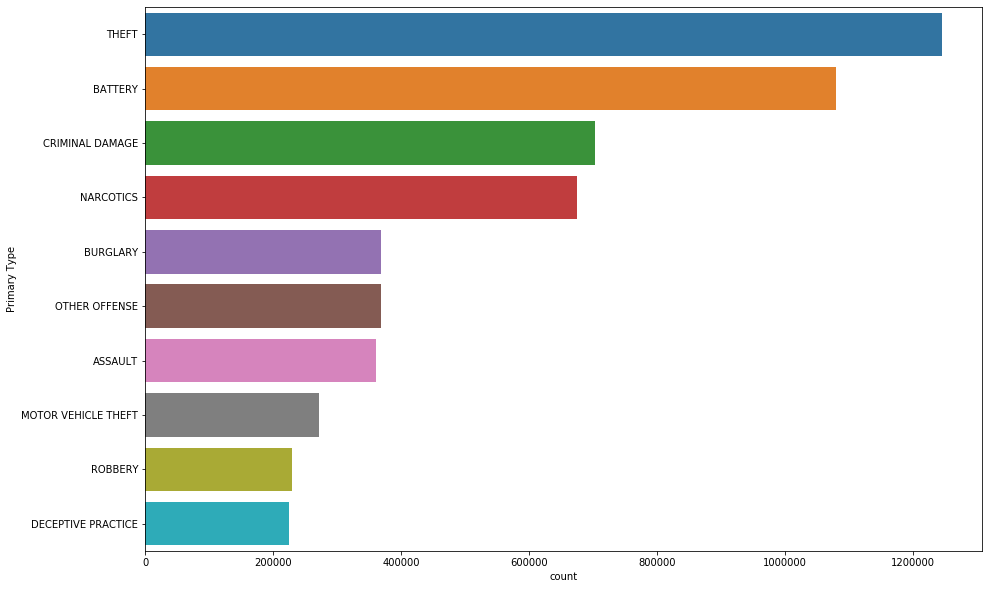

In [20]:
plt.figure(figsize= (15,10))
sns.countplot(y= "Primary Type", data= chic, order= top_10_types)

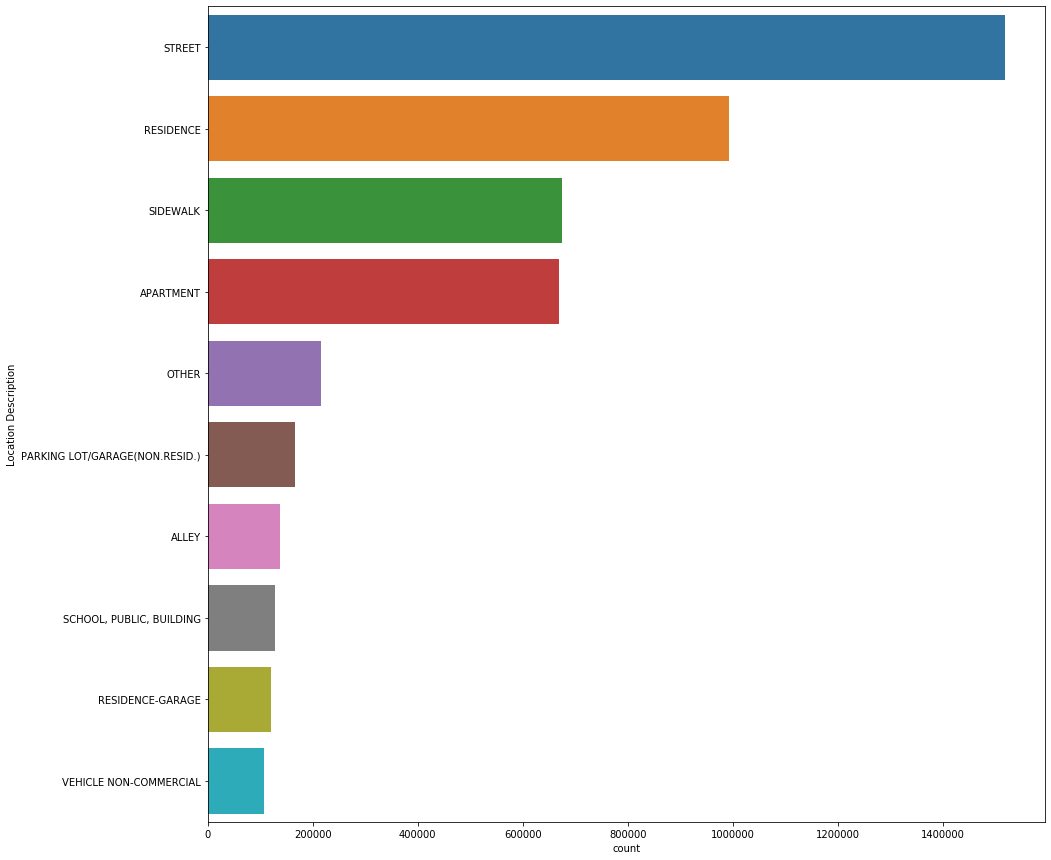

In [22]:
#TOP 10 LOCATION DESCRIPTION
top_10_dlocation = chic["Location Description"].value_counts().iloc[:10].index
plt.figure(figsize= (15,15))
sns.countplot(y= "Location Description", data = chic, order=top_10_dlocation)

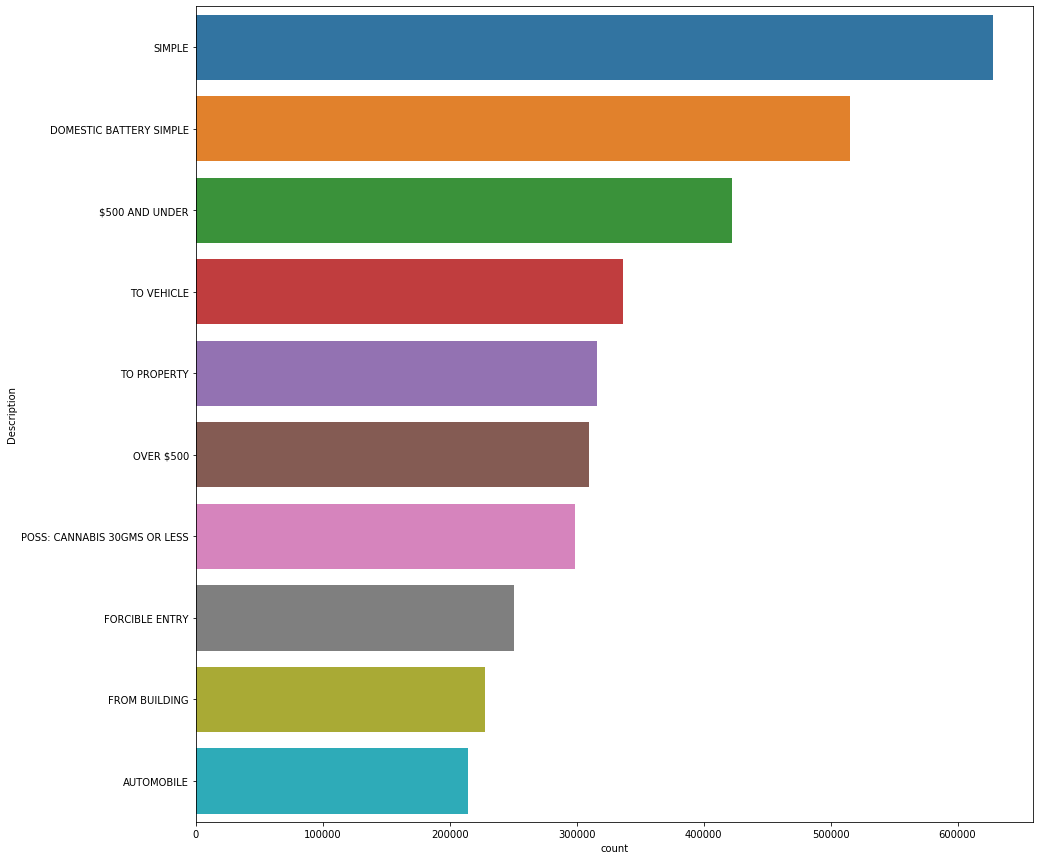

In [23]:
#TOP TEN DESCRIPTION
top_10_description = chic["Description"].value_counts().iloc[:10].index
plt.figure(figsize = (15,15))
sns.countplot(y= "Description", data= chic, order= top_10_description)

In [25]:
#Date column as index
chic.index = pd.DatetimeIndex(chic.Date)
chic.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of crimes')

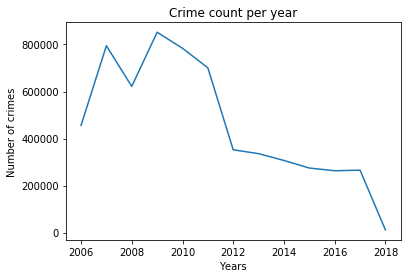

In [26]:
#Visualizing number of crimes per year
plt.plot(chic.resample('Y').size())
plt.title('Crime count per year')
plt.xlabel('Years')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

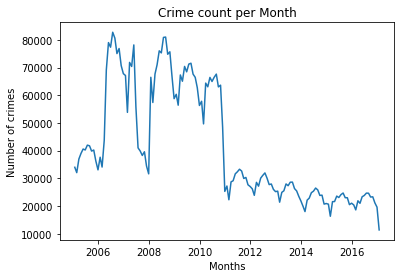

In [27]:
#Visualizing number of crimes per month
plt.plot(chic.resample('M').size())
plt.title('Crime count per Month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

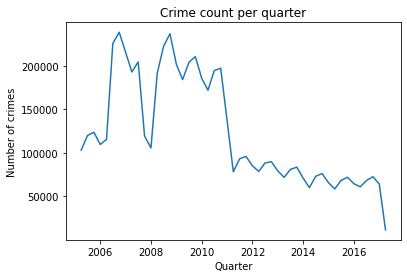

In [28]:
#Visualizing number of crimes per quarter
plt.plot(chic.resample('Q').size())
plt.title('Crime count per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of crimes')

# DATA PREPARATION

In [29]:
#New dataframe indexed by month
chic_p = chic.resample('M').size().reset_index()
chic_p

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [30]:
#Columns renamed and final df
chic_p.columns = ['Date', 'CrimeCount']
chic_p_final= chic_p.rename(columns= {"Date": "ds", "CrimeCount":"y"})

# MAKE PREDICTIONS

In [31]:
m= Prophet()
m.fit(chic_p_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#What will happen in 1 year
future= m.make_future_dataframe(periods=365)
forecast= m.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,38928.352856,72990.457479,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,33331.667946,67621.094065,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,40746.582165,75275.790317,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,45029.236273,78101.171298,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,48361.866365,81767.000448,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.146683,-12407.537182,21187.426973,9947.682353,10268.040449,-4977.920771,-4977.920771,-4977.920771,-4977.920771,-4977.920771,-4977.920771,0.0,0.0,0.0,5126.225912
506,2018-01-28,10091.080010,-10501.393433,22087.949086,9934.089110,10255.480001,-4922.571939,-4922.571939,-4922.571939,-4922.571939,-4922.571939,-4922.571939,0.0,0.0,0.0,5168.508071
507,2018-01-29,10078.013336,-10606.118703,21997.218771,9920.373267,10242.902542,-4867.895035,-4867.895035,-4867.895035,-4867.895035,-4867.895035,-4867.895035,0.0,0.0,0.0,5210.118301
508,2018-01-30,10064.946663,-10561.363028,21320.601706,9906.422735,10230.325082,-4816.721706,-4816.721706,-4816.721706,-4816.721706,-4816.721706,-4816.721706,0.0,0.0,0.0,5248.224956


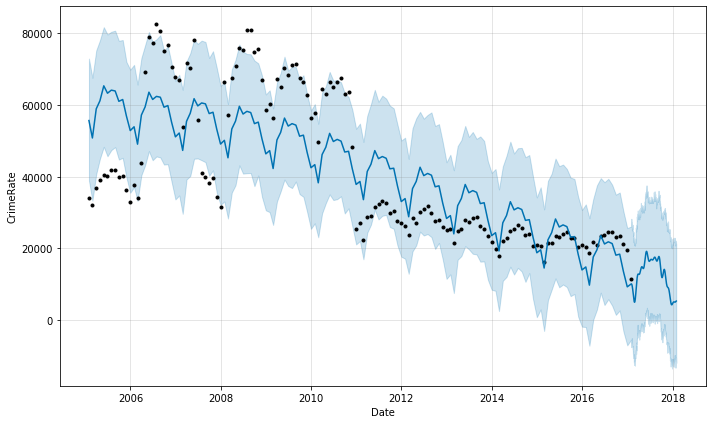

In [34]:
figure= m.plot(forecast, xlabel="Date", ylabel="CrimeRate")

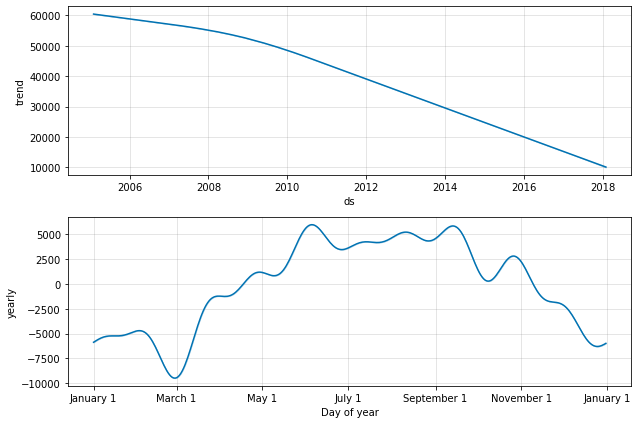

In [35]:
figure= m.plot_components(forecast)

In [38]:
#What will happen in 4 years?
future4= m.make_future_dataframe(periods=1460)
forecast4= m.predict(future4)
forecast4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,39105.806080,73716.442620,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,34240.948376,66551.828555,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,42913.614770,75776.208118,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,44016.061690,78097.625205,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,48001.085371,81470.978335,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,2021-01-26,-4203.860886,-25136.552050,7526.830768,-5689.894870,-2751.100250,-5018.358698,-5018.358698,-5018.358698,-5018.358698,-5018.358698,-5018.358698,0.0,0.0,0.0,-9222.219585
1601,2021-01-27,-4216.927560,-25011.712283,6927.273087,-5704.064995,-2763.556708,-4964.163392,-4964.163392,-4964.163392,-4964.163392,-4964.163392,-4964.163392,0.0,0.0,0.0,-9181.090951
1602,2021-01-28,-4229.994233,-25514.137440,6661.401408,-5718.235121,-2776.013166,-4908.734311,-4908.734311,-4908.734311,-4908.734311,-4908.734311,-4908.734311,0.0,0.0,0.0,-9138.728545
1603,2021-01-29,-4243.060907,-26290.907199,7907.537979,-5732.405246,-2788.469624,-4854.656306,-4854.656306,-4854.656306,-4854.656306,-4854.656306,-4854.656306,0.0,0.0,0.0,-9097.717213


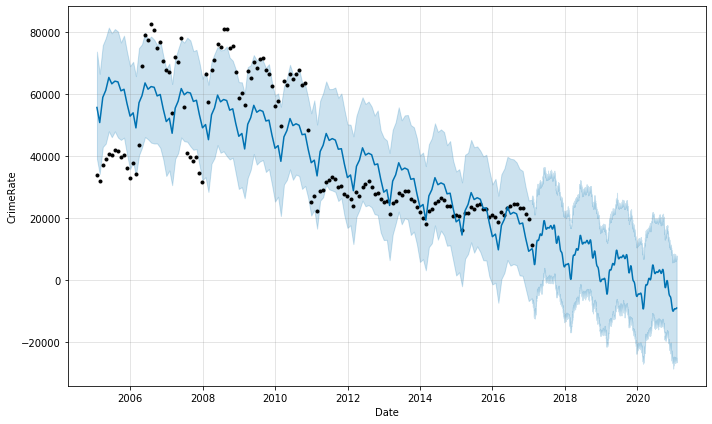

In [39]:
figure4= m.plot(forecast4, xlabel="Date", ylabel="CrimeRate")

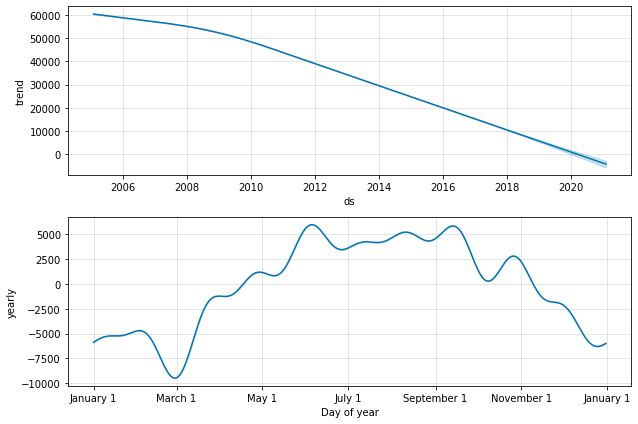

In [40]:
figure4= m.plot_components(forecast4)